In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/sample_data/Apple.csv') #reading stock prices


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,2000-01-03
1,0.966518,0.987723,0.903460,0.915179,0.778926,512377600,2000-01-04
2,0.926339,0.987165,0.919643,0.928571,0.790324,778321600,2000-01-05
3,0.947545,0.955357,0.848214,0.848214,0.721931,767972800,2000-01-06
4,0.861607,0.901786,0.852679,0.888393,0.756127,460734400,2000-01-07


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,30.964461,31.318350,30.619127,30.982545,29.763246,4.112873e+08
std,44.291183,44.842037,43.768914,44.328922,44.158932,3.867277e+08
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.519590e+07
25%,1.931965,1.955714,1.897143,1.925714,1.639011,1.384356e+08
50%,13.321429,13.523214,13.160357,13.358929,11.370029,2.942240e+08
75%,36.438751,36.795000,36.237501,36.577499,34.384544,5.476394e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Check data types
print(data.dtypes)


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64
0
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Date          object
dtype: object


<Axes: >

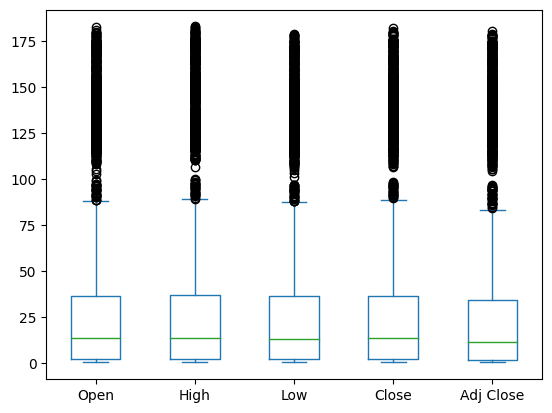

In [ ]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box') #box plot to visually check for outliers


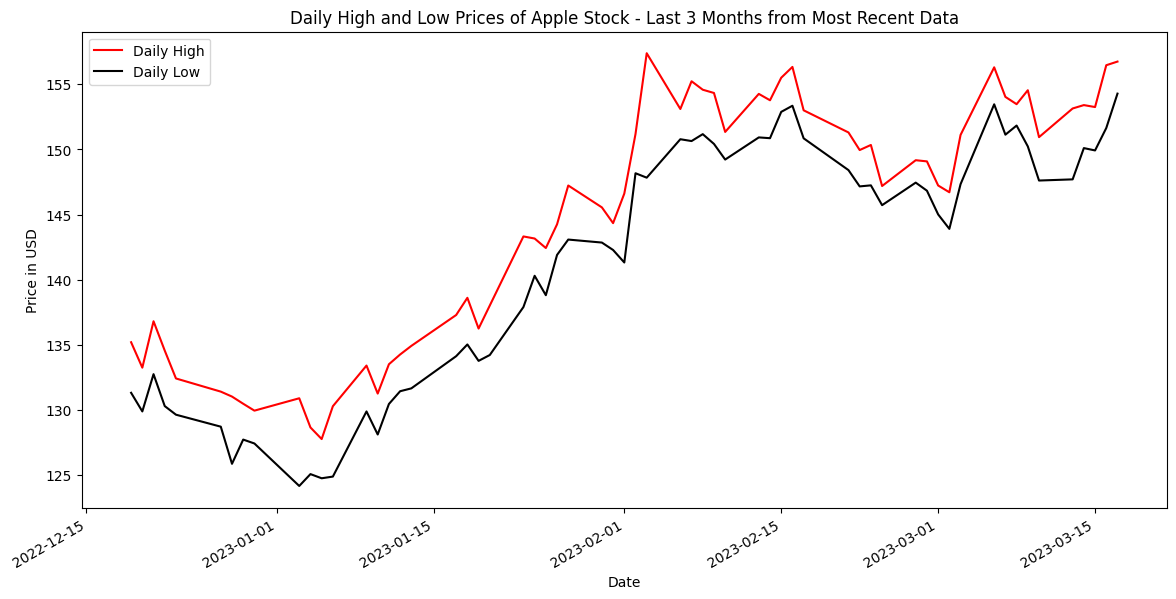

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta


data['Date'] = pd.to_datetime(data['Date'])

max_date = data['Date'].max()

three_months_prior = max_date - timedelta(days=90)

three_months_data_full = data[(data['Date'] >= three_months_prior) & (data['Date'] <= max_date)]

plt.figure(figsize=(14, 7))
plt.plot(three_months_data_full['Date'], three_months_data_full['High'], color='red', label='Daily High')
plt.plot(three_months_data_full['Date'], three_months_data_full['Low'], color='black', label='Daily Low')

plt.title('Daily High and Low Prices of Apple Stock - Last 3 Months from Most Recent Data')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(False)

plt.gcf().autofmt_xdate() # Automatic date rotation

plt.show()


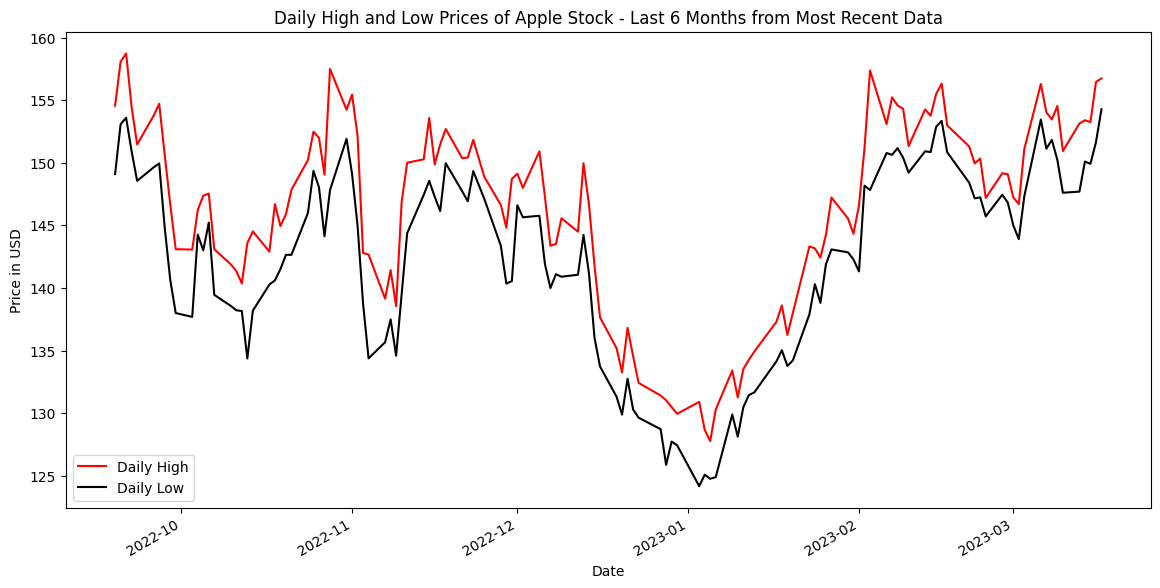

In [ ]:
from datetime import timedelta

max_date = data['Date'].max()

six_months_prior = max_date - timedelta(days=180)

six_months_data_full = data[(data['Date'] >= six_months_prior) & (data['Date'] <= max_date)]

plt.figure(figsize=(14, 7))
plt.plot(six_months_data_full['Date'], six_months_data_full['High'], color='red', label='Daily High')
plt.plot(six_months_data_full['Date'], six_months_data_full['Low'], color='black', label='Daily Low')

plt.title('Daily High and Low Prices of Apple Stock - Last 6 Months from Most Recent Data')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(False)

plt.gcf().autofmt_xdate() 

plt.show()


Last 3months graphs shows an increasing trend
Whereas last 6months , we can see when significant drops or gains occurred
Volatility: Both graphs show some degree of volatility, with prices fluctuating between highs and lows over the periods depicted. This can be indicative of various factors influencing the market, such as company performance, economic news, or broader market trends

In summary, while the six-month graph starts with a decline followed by some recovery, the three-month graph suggests that the recovery has continued and become more established

C:\Users\saipr\AppData\Local\Temp\ipykernel_15992\625179521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  six_months_data['% Change 6 Months'] = ((six_months_data['Close'] - six_months_data['Open']) / six_months_data['Open']) * 100


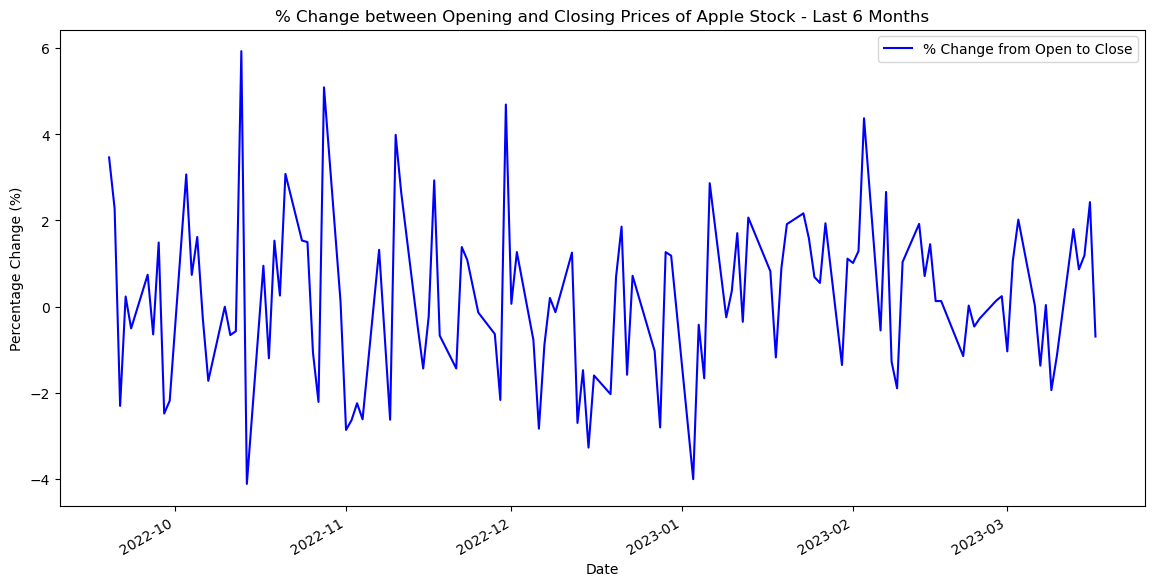

In [ ]:
six_months_prior = max_date - timedelta(days=180)
six_months_data = data[data['Date'] >= six_months_prior]

six_months_data['% Change 6 Months'] = ((six_months_data['Close'] - six_months_data['Open']) / six_months_data['Open']) * 100

plt.figure(figsize=(14, 7))
plt.plot(six_months_data['Date'], six_months_data['% Change 6 Months'], color='blue', label='% Change from Open to Close')

plt.title('% Change between Opening and Closing Prices of Apple Stock - Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(False)


plt.gcf().autofmt_xdate() 

# Show the plot
plt.show()


a sharp increase in early October and a steep drop in late October. Mid-December also shows a pronounced downturn, followed by a recovery in late January. However, on most day we see a random drop and increase of stock prices every day


C:\Users\saipr\AppData\Local\Temp\ipykernel_15992\1305978219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  six_months_data['% Change 3 Months'] = ((six_months_data['Close'] - six_months_data['Open']) / six_months_data['Open']) * 100


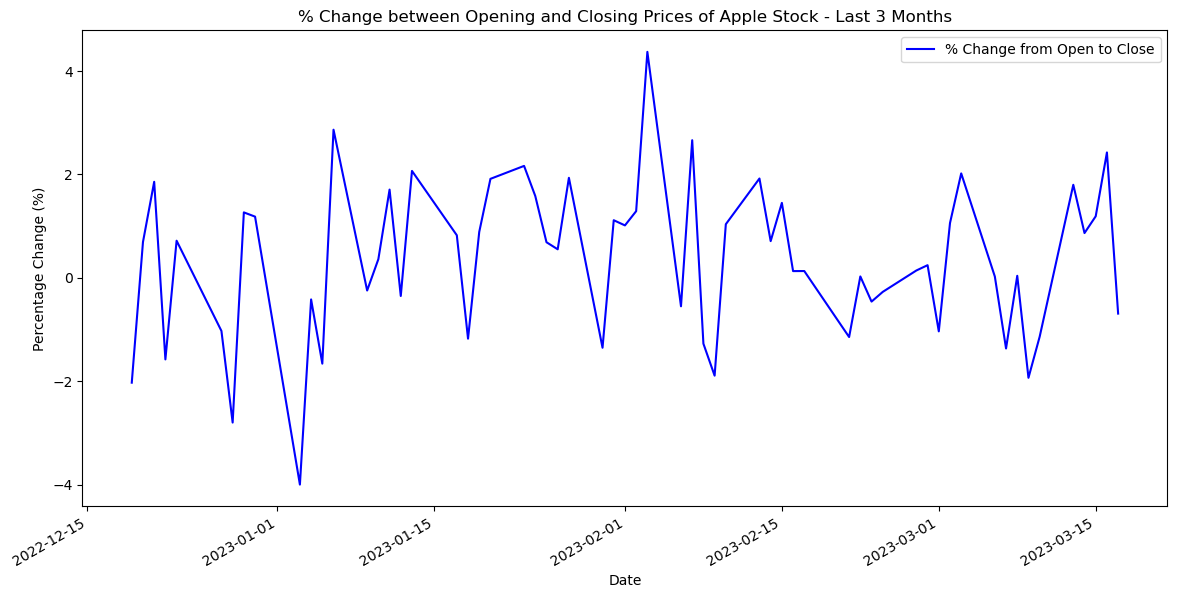

In [ ]:
three_months_prior = max_date - timedelta(days=90)
six_months_data = data[data['Date'] >= three_months_prior]

six_months_data['% Change 3 Months'] = ((six_months_data['Close'] - six_months_data['Open']) / six_months_data['Open']) * 100

plt.figure(figsize=(14, 7))
plt.plot(six_months_data['Date'], six_months_data['% Change 3 Months'], color='blue', label='% Change from Open to Close')

plt.title('% Change between Opening and Closing Prices of Apple Stock - Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(False)


plt.gcf().autofmt_xdate() 

# Show the plot
plt.show()


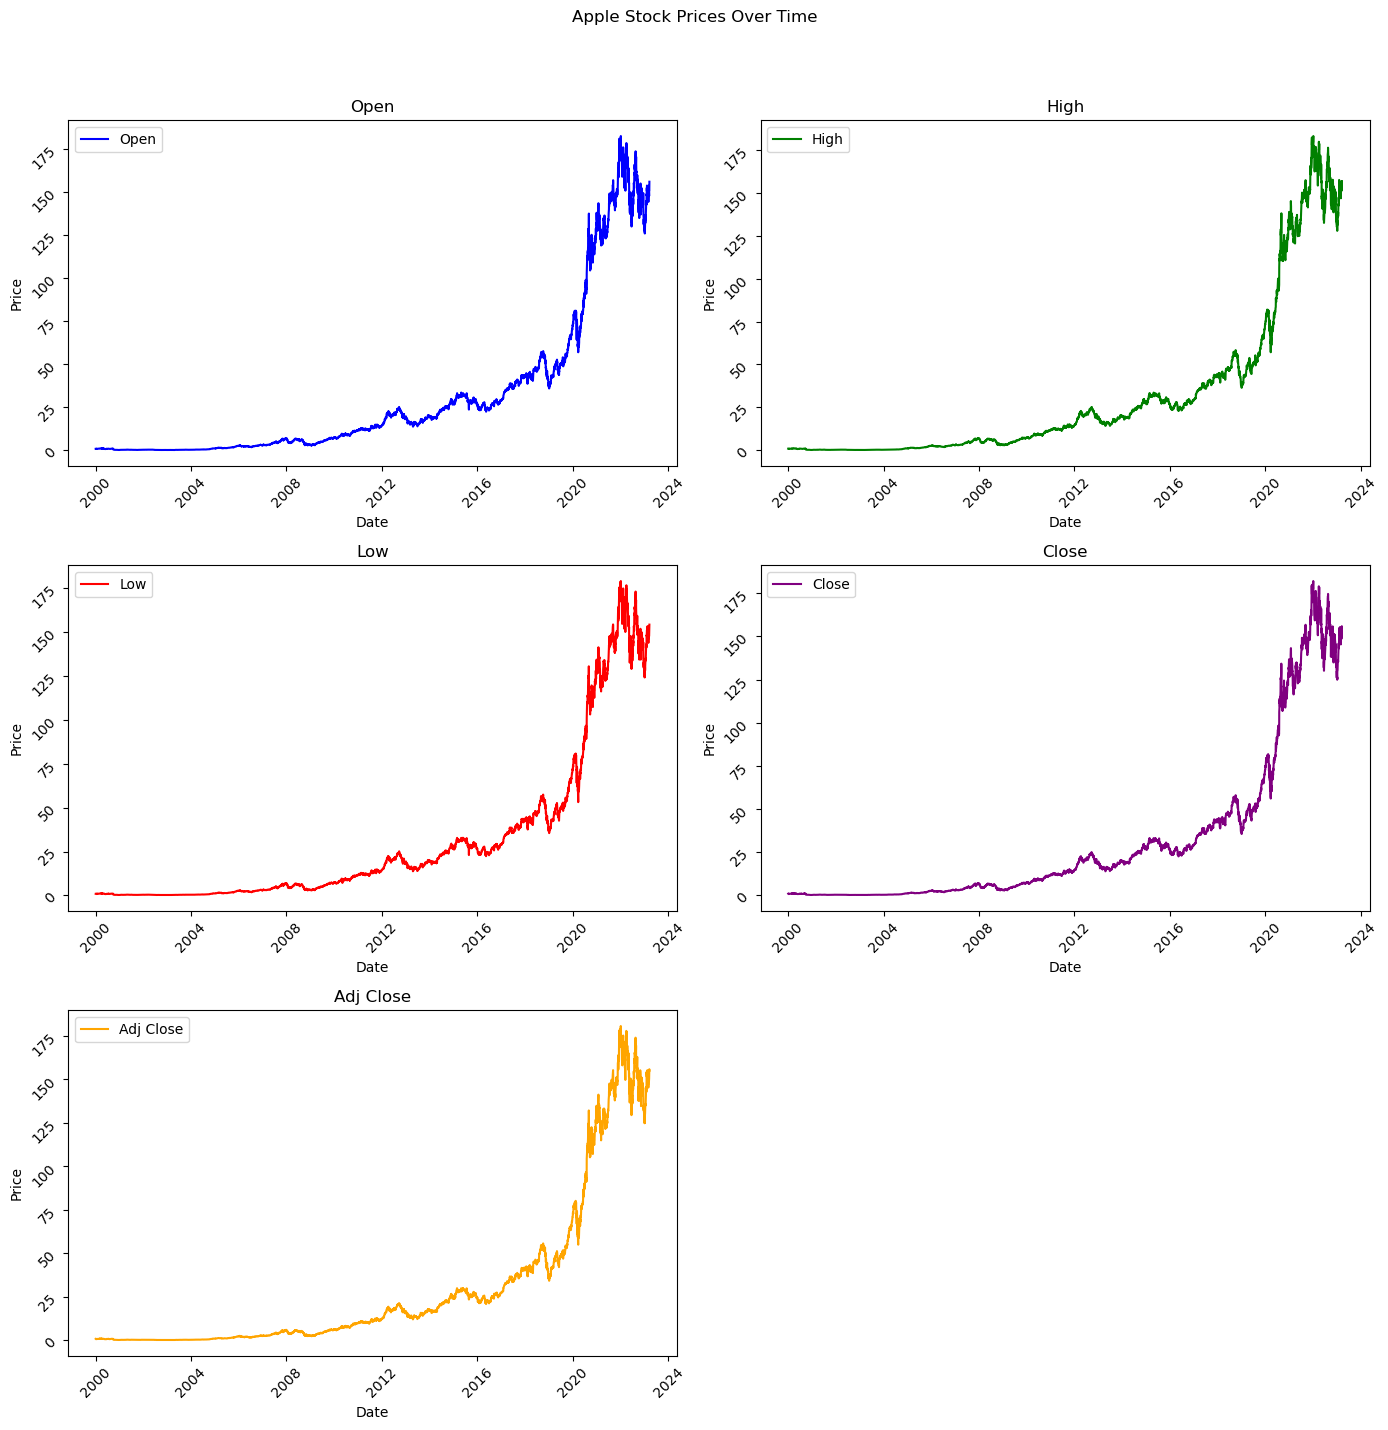

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
fig.suptitle('Apple Stock Prices Over Time')

axes = axes.flatten()

fig.delaxes(axes[-1])

titles = ['Open', 'High', 'Low', 'Close', 'Adj Close']

colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, col in enumerate(titles):
    axes[i].plot(data['Date'], data[col], label=col, color=colors[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(False)
    axes[i].tick_params(labelrotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


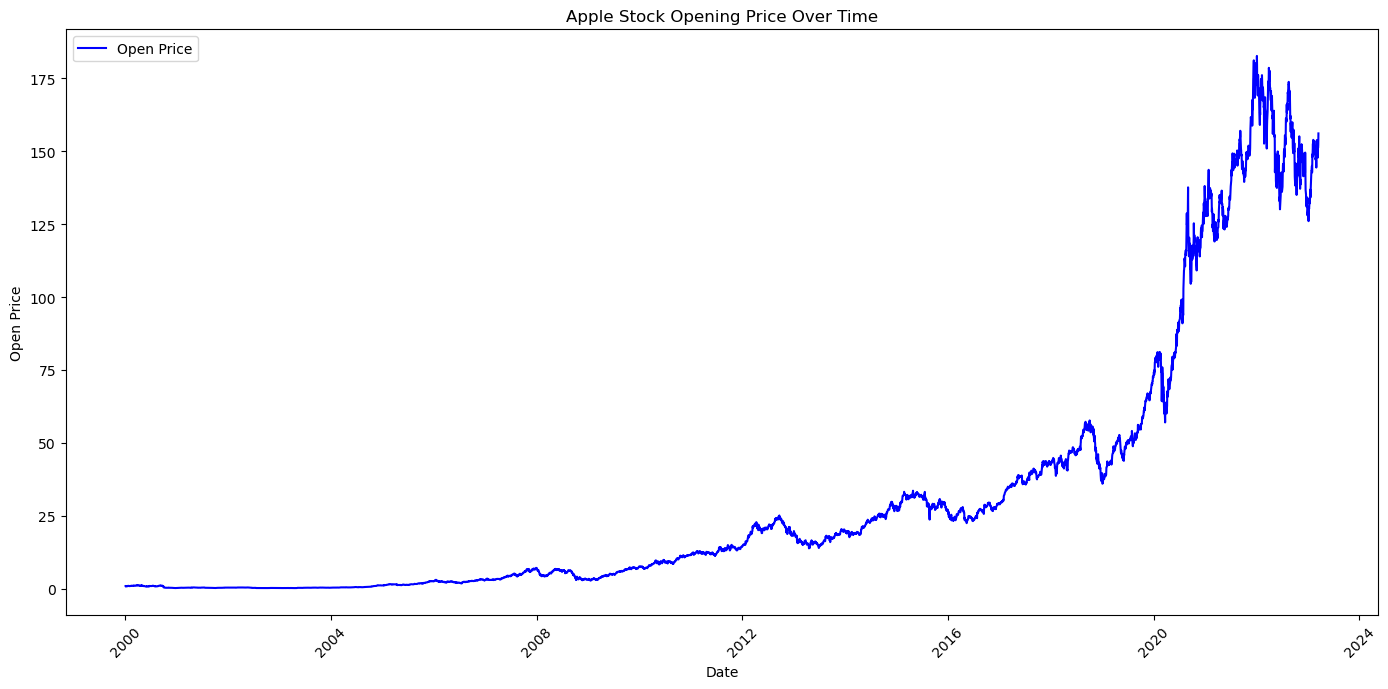

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Open'], label='Open Price', color='blue')
plt.title('Apple Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The price represents how much the stock was worth at the start of the trading day. The chart shows a long-term upward trend with occasional volatility and short-term declines. Notably, there is a sharp rise from 2019 to 2020, which may reflect market optimism or company-specific news.
Trend:There is a clear upward trend in the stock prices over time.
Seasonality: From this graph, it is not so clear seasonality. Futher analysis is required
All the values are not concentrated around the mean. As a result, pre-processing methods like log differencing (for removing
trend) is required


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['Open'])

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output


Test Statistic                    1.401883
p-value                           0.997123
#Lags Used                       26.000000
Number of Observations Used    5812.000000
Critical Value (1%)              -3.431476
Critical Value (5%)              -2.862037
Critical Value (10%)             -2.567035
dtype: float64

The Augmented Dickey-Fuller (ADF) test yields a test statistic of 1.401883, with a p-value of 0.99. Since the p-value is greater than the common significance levels (0.01, 0.05, and 0.10), we fail to reject the null hypothesis that the time series has a unit root and is non-stationary.

This suggests that the open prices of Apple's stock are non-stationary and have properties like a trend or seasonal variation.

In [ ]:
# Applying log difference transformation across the entire dataset
data['Log_Diff_Close'] = np.log(data['Close']).diff()

data['Log_Diff_Open'] = np.log(data['Open']).diff()

data['Log_Diff_High'] = np.log(data['High']).diff()

data['Log_Diff_low'] = np.log(data['Low']).diff()


# Removing the NaN value in the first row that results from the differencing
apple_stock_log_diff_complete = data.dropna(subset=['Log_Diff_Close'])

print(apple_stock_log_diff_complete.isnull().sum())




Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Date              0
Log_Diff_Close    0
Log_Diff_Open     0
Log_Diff_High     0
Log_Diff_low      0
dtype: int64


In [ ]:

apple_stock_log_diff_complete[['Date', 'Close', 'Log_Diff_Close']].head()


,Date,Close,Log_Diff_Close
1,2000-01-04,0.915179,-0.088077
2,2000-01-05,0.928571,0.014527
3,2000-01-06,0.848214,-0.090514
4,2000-01-07,0.888393,0.046281
5,2000-01-10,0.872768,-0.017744


C:\Users\saipr\AppData\Local\Temp\ipykernel_13476\1984249934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_log_diff_complete['Date'] = pd.to_datetime(apple_stock_log_diff_complete['Date'])


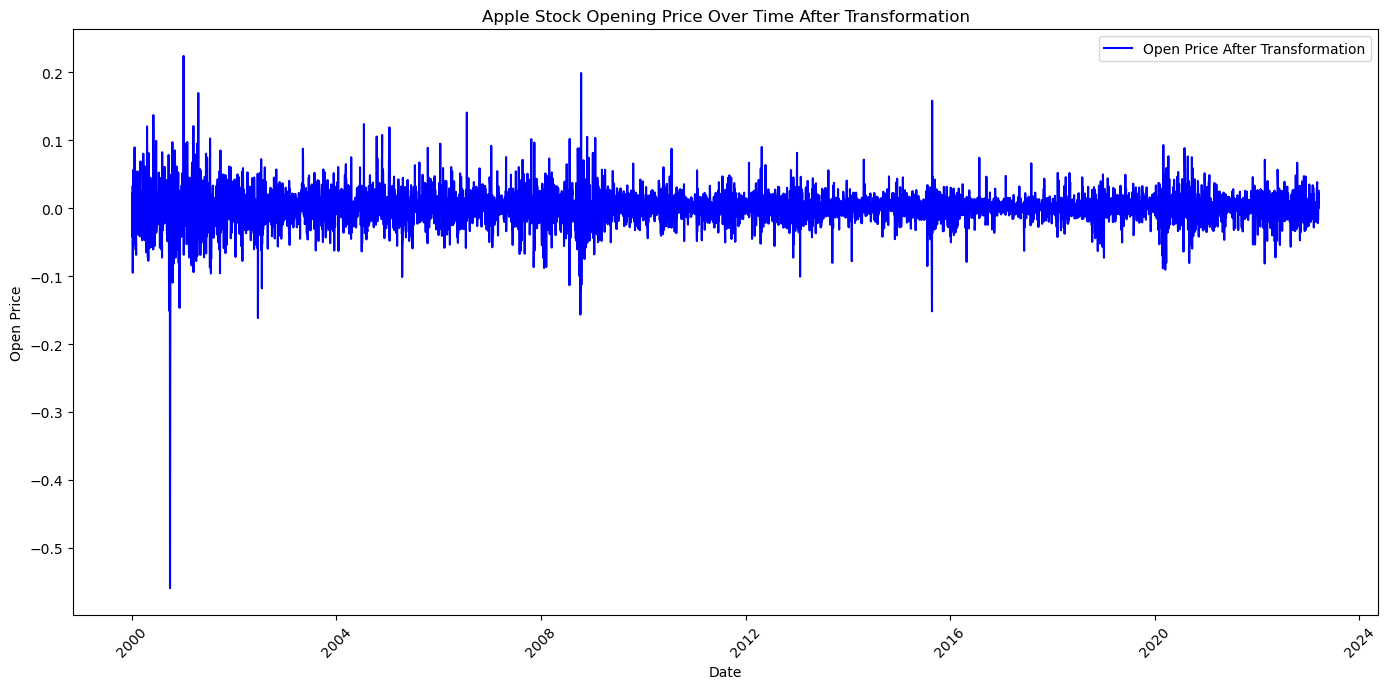

In [ ]:
apple_stock_log_diff_complete['Date'] = pd.to_datetime(apple_stock_log_diff_complete['Date'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(apple_stock_log_diff_complete['Date'], apple_stock_log_diff_complete['Log_Diff_Open'], label='Open Price After Transformation'
         , color='blue')
plt.title('Apple Stock Opening Price Over Time After Transformation')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\saipr\AppData\Local\Temp\ipykernel_15992\293120970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_years_data['Log_Open'] = np.log(three_years_data['Open'])
C:\Users\saipr\AppData\Local\Temp\ipykernel_15992\293120970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_years_data['Log_Diff_Open'] = three_years_data['Log_Open'].diff().dropna()


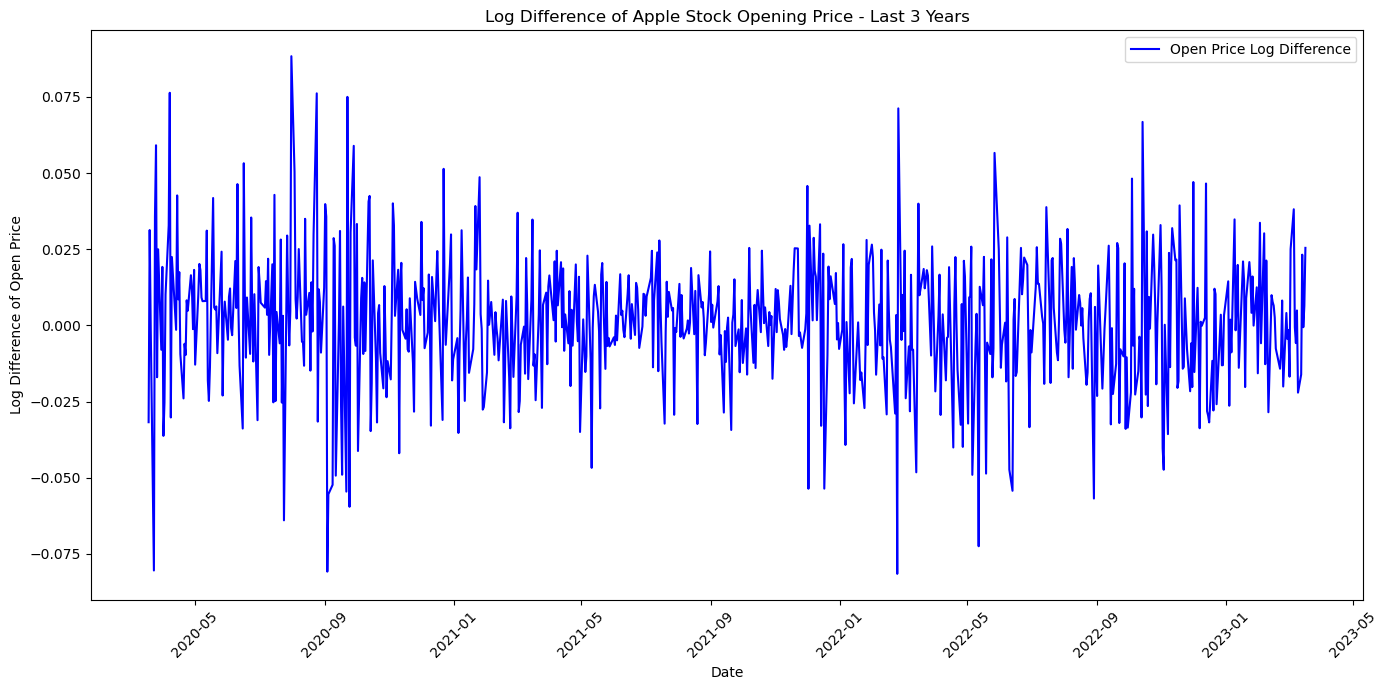

In [ ]:
three_years_ago = apple_stock_log_diff_complete['Date'].max() - pd.DateOffset(years=3)
three_years_data = apple_stock_log_diff_complete[apple_stock_log_diff_complete['Date'] >= three_years_ago]

three_years_data['Log_Open'] = np.log(three_years_data['Open'])
three_years_data['Log_Diff_Open'] = three_years_data['Log_Open'].diff().dropna()

plt.figure(figsize=(14, 7))
plt.plot(three_years_data['Date'], three_years_data['Log_Diff_Open'], label='Open Price Log Difference', color='blue')
plt.title('Log Difference of Apple Stock Opening Price - Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Log Difference of Open Price')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(apple_stock_log_diff_complete['Log_Diff_Open'])

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output


Test Statistic                -1.451920e+01
p-value                        5.560137e-27
#Lags Used                     2.600000e+01
Number of Observations Used    5.811000e+03
Critical Value (1%)           -3.431476e+00
Critical Value (5%)           -2.862038e+00
Critical Value (10%)          -2.567035e+00
dtype: float64

From the test scores it is evident that the the time series is stationary and accept the null hypothesis

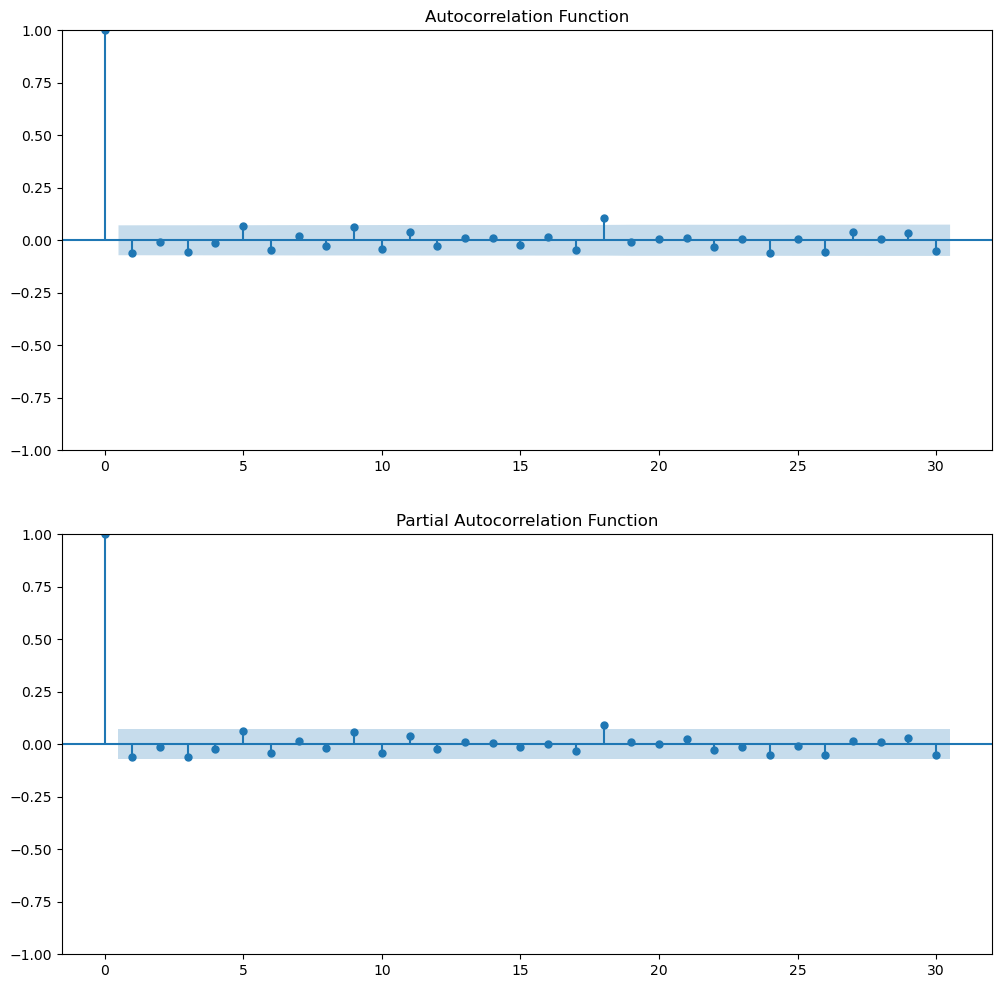

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

plot_acf(apple_stock_log_diff_complete['Log_Diff_Open'], lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function')

plot_pacf(apple_stock_log_diff_complete['Log_Diff_Open'], lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.show()


ACF Plot: We have observed a significant spike in the ACF plot at time step 1
PACF Plot:We have observed a significant spike in the PACF plot at time step

ARIMA (1,0,0), ARIMA (0,0,1), ARIMA (1,0,1), ARIMA (1,1,1)

In [ ]:
pip install statsmodels


In [ ]:
unit_rate_series = apple_stock_log_diff_complete['Log_Diff_Open']

split_point = int(len(unit_rate_series) * 0.8)
train, test = unit_rate_series[0:split_point], unit_rate_series[split_point:]



In [ ]:
import warnings

warnings.filterwarnings("ignore")

import statsmodels.api as sm


model_arima_100 = sm.tsa.ARIMA(train, order=(1,0,0))
results_arima_100 = model_arima_100.fit()

print(results_arima_100.summary())


                               SARIMAX Results                                
Dep. Variable:          Log_Diff_Open   No. Observations:                 4670
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10271.551
Date:                Wed, 10 Apr 2024   AIC                         -20537.101
Time:                        03:19:39   BIC                         -20517.754
Sample:                             0   HQIC                        -20530.297
                               - 4670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      2.209      0.027    9.54e-05       0.002
ar.L1         -0.0733      0.008     -9.204      0.000      -0.089      -0.058
sigma2         0.0007    3.2e-06    224.672      0.0

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(train, results_arima_100.fittedvalues)
print(f'Mean Squared Error ARIMA(1,0,0): {mse}')


Mean Squared Error ARIMA(1,0,0): 0.000719590909554368


In [ ]:
model_arima_001 = sm.tsa.ARIMA(train, order=(0,0,1))
results_arima_001 = model_arima_001.fit()

print(results_arima_001.summary())


                               SARIMAX Results                                
Dep. Variable:          Log_Diff_Open   No. Observations:                 4670
Model:                 ARIMA(0, 0, 1)   Log Likelihood               10270.968
Date:                Wed, 10 Apr 2024   AIC                         -20535.936
Time:                        03:19:45   BIC                         -20516.589
Sample:                             0   HQIC                        -20529.132
                               - 4670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      2.203      0.028    9.29e-05       0.002
ma.L1         -0.0712      0.008     -8.947      0.000      -0.087      -0.056
sigma2         0.0007   3.22e-06    223.704      0.0

In [ ]:
mse_001 = mean_squared_error(train, results_arima_001.fittedvalues)
print(f'Mean Squared Error ARIMA(0,0,1): {mse_001}')


Mean Squared Error ARIMA(0,0,1): 0.0007197704546353685


In [ ]:
model_arima_101 = sm.tsa.ARIMA(train, order=(1,0,1))
results_arima_101 = model_arima_101.fit()

print(results_arima_101.summary())


                               SARIMAX Results                                
Dep. Variable:          Log_Diff_Open   No. Observations:                 4670
Model:                 ARIMA(1, 0, 1)   Log Likelihood               10272.704
Date:                Wed, 10 Apr 2024   AIC                         -20537.408
Time:                        03:19:51   BIC                         -20511.613
Sample:                             0   HQIC                        -20528.336
                               - 4670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      2.169      0.030    8.12e-05       0.002
ar.L1         -0.3395      0.106     -3.195      0.001      -0.548      -0.131
ma.L1          0.2683      0.109      2.465      0.0

In [ ]:
mse_101 = mean_squared_error(train, results_arima_101.fittedvalues)
print(f'Mean Squared Error ARIMA(1,0,1): {mse_101}')


Mean Squared Error ARIMA(1,0,1): 0.000719235571483918


In [ ]:
model_arima_111 = sm.tsa.ARIMA(train, order=(1,1,1))
results_arima_111 = model_arima_111.fit()

print(results_arima_111.summary())


                               SARIMAX Results                                
Dep. Variable:          Log_Diff_Open   No. Observations:                 4670
Model:                 ARIMA(1, 1, 1)   Log Likelihood               10265.117
Date:                Wed, 10 Apr 2024   AIC                         -20524.233
Time:                        03:19:57   BIC                         -20504.887
Sample:                             0   HQIC                        -20517.429
                               - 4670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0748      0.008     -9.303      0.000      -0.091      -0.059
ma.L1         -0.9977      0.001   -841.719      0.000      -1.000      -0.995
sigma2         0.0007   3.19e-06    225.562      0.0

In [ ]:
mse_111 = mean_squared_error(train, results_arima_111.fittedvalues)
print(f'Mean Squared Error ARIMA(1,1,1): {mse_111}')


Mean Squared Error ARIMA(1,1,1): 0.0007231314960000677


In [ ]:
model_arima_200 = sm.tsa.ARIMA(train, order=(2,0,0))
results_arima_200 = model_arima_200.fit()

print(results_arima_200.summary())


                               SARIMAX Results                                
Dep. Variable:          Log_Diff_Open   No. Observations:                 4670
Model:                 ARIMA(2, 0, 0)   Log Likelihood               10272.620
Date:                Wed, 10 Apr 2024   AIC                         -20537.241
Time:                        03:20:02   BIC                         -20511.445
Sample:                             0   HQIC                        -20528.169
                               - 4670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      2.155      0.031    7.65e-05       0.002
ar.L1         -0.0714      0.008     -8.896      0.000      -0.087      -0.056
ar.L2          0.0214      0.010      2.190      0.0

In [ ]:
mse_200 = mean_squared_error(train, results_arima_200.fittedvalues)
print(f'Mean Squared Error ARIMA(2,0,0): {mse_200}')


Mean Squared Error ARIMA(2,0,0): 0.0007192613485610101


In [ ]:
arima_orders = [(1,0,0), (0,0,1), (1,0,1), (1,1,1), (2,0,0)]

results_list = []

for order in arima_orders:
    model = sm.tsa.ARIMA(train, order=order)
    results = model.fit()

    mse = mean_squared_error(train, results.fittedvalues)

    rmse = np.sqrt(mse)

    results_list.append({
        'Model': f'ARIMA{order}',
        'AIC': results.aic,
        'BIC': results.bic,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results_list)

print(results_df.to_string(index=False))



         Model           AIC           BIC     RMSE
ARIMA(1, 0, 0) -20537.101105 -20517.754362 0.026825
ARIMA(0, 0, 1) -20535.935857 -20516.589114 0.026829
ARIMA(1, 0, 1) -20537.408280 -20511.612623 0.026819
ARIMA(1, 1, 1) -20524.233189 -20504.887089 0.026891
ARIMA(2, 0, 0) -20537.240841 -20511.445184 0.026819


ARIMA (1,0,0) is the best suitable model among all the models as it has lowest AIC, BIC.
ARIMA(1,0,1) is best suitable based on RMSE


Given the minimal differences in RMSE and the lower AIC and BIC values for the ARIMA(1, 0, 1) is considered the better model. It provides a good balance between fitting the data well and maintaining

In [ ]:
predictions_101 = results_arima_101.get_forecast(steps=30).predicted_mean


In [ ]:
last_close_price = data['Open'].iloc[-1]

# Reverse the log differencing for ARIMA(1,0,1) predictions
predicted_log_101 = np.cumsum(predictions_101)
predicted_original_101 = np.exp(predicted_log_101) + last_close_price


In [ ]:
from math import sqrt

model_best_arima = sm.tsa.ARIMA(train, order=(1,0,1))

results_best_arima = model_best_arima.fit()

predictions = results_best_arima.forecast(steps=len(test))

mse = mean_squared_error(train, results_best_arima.fittedvalues)
rmse_best = np.sqrt(mse)
print('Train RMSE: %.3f' % rmse_best)

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Train RMSE: 0.027
Test RMSE: 0.021


In [ ]:
predicted_original_101.head(2)

4670    157.080322
4671    157.081343
Name: predicted_mean, dtype: float64

In [ ]:
data.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Date,Log_Diff_Close,Log_Diff_Open,Log_Diff_High,Log_Diff_low
5837,152.160004,156.460007,151.639999,155.850006,155.850006,76161100,2023-03-16,0.018521,0.006395,0.020730,0.011407
5838,156.080002,156.740005,154.279999,155.000000,155.000000,98862500,2023-03-17,-0.005469,0.025436,0.001788,0.017260


In [ ]:
unit_rate_series = apple_stock_log_diff_complete['Log_Diff_Open']

split_point = int(len(unit_rate_series) * 0.7)
train1, test1 = unit_rate_series[0:split_point], unit_rate_series[split_point:]


order = (1, 0, 1)
seasonal_order = (1, 1, 1, 5)
model_SARIMA_5 = sm.tsa.SARIMAX(train1, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
results_SARIMA5 = model_SARIMA_5.fit()

# Print model summary
print(results_SARIMA5.summary())


                                     SARIMAX Results                                     
Dep. Variable:                     Log_Diff_Open   No. Observations:                 4086
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 5)   Log Likelihood                8754.509
Date:                           Wed, 10 Apr 2024   AIC                         -17499.018
Time:                                   03:45:48   BIC                         -17467.447
Sample:                                        0   HQIC                        -17487.838
                                          - 4086                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5484      0.096     -5.697      0.000      -0.737      -0.360
ma.L1          0.4819      0.101      4.783

In [ ]:
mse = mean_squared_error(train1, results_SARIMA5.fittedvalues)
rmse_sarima1 = np.sqrt(mse)
rmse_sarima1

0.028543189746777456

In [ ]:
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 21)
model_SARIMA_21=sm.tsa.SARIMAX(train1, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
model_SARIMA_21 = model_SARIMA_21.fit()

# Print model summary
print(model_SARIMA_21.summary())


                                     SARIMAX Results                                      
Dep. Variable:                      Log_Diff_Open   No. Observations:                 4086
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 21)   Log Likelihood                8678.796
Date:                            Wed, 10 Apr 2024   AIC                         -17347.592
Time:                                    03:46:54   BIC                         -17316.041
Sample:                                         0   HQIC                        -17336.417
                                           - 4086                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3678      0.115     -3.186      0.001      -0.594      -0.142
ma.L1          0.2961      0.119   

In [ ]:
mse = mean_squared_error(train1, model_SARIMA_21.fittedvalues)
rmse_sarima21 = np.sqrt(mse)
rmse_sarima21

0.029252480481415995

In [ ]:
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 62)
model_SARIMA_62=sm.tsa.SARIMAX(train1, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
model_SARIMA_62 = model_SARIMA_62.fit()

# Print model summary
print(model_SARIMA_62.summary())


                                     SARIMAX Results                                      
Dep. Variable:                      Log_Diff_Open   No. Observations:                 4086
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 62)   Log Likelihood                8515.138
Date:                            Wed, 10 Apr 2024   AIC                         -17020.275
Time:                                    04:00:23   BIC                         -16988.775
Sample:                                         0   HQIC                        -17009.112
                                           - 4086                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5534      0.104     -5.341      0.000      -0.756      -0.350
ma.L1          0.4947      0.109   

In [ ]:
mse = mean_squared_error(train1, model_SARIMA_62.fittedvalues)
rmse_sarima62 = np.sqrt(mse)
rmse_sarima62

0.030264546725201832

In [ ]:
results_list = []

results_list.append({
        'Model': '[1,0,1,1,1,1,5]',
        'AIC': results_SARIMA5.aic,
        'BIC': results_SARIMA5.bic,
        'RMSE': rmse_sarima1
    })

results_list.append({
        'Model': '[1,0,1,1,1,1,21]',
        'AIC': model_SARIMA_21.aic,
        'BIC': model_SARIMA_21.bic,
        'RMSE': rmse_sarima21
    })

results_list.append({
        'Model': '[1,0,1,1,1,1,62]',
        'AIC': model_SARIMA_62.aic,
        'BIC': model_SARIMA_62.bic,
        'RMSE': rmse_sarima62
    })

results_df_Seasonal = pd.DataFrame(results_list)

print(results_df_Seasonal.to_string(index=False))


           Model           AIC           BIC     RMSE
 [1,0,1,1,1,1,5] -17499.017672 -17467.447185 0.028543
[1,0,1,1,1,1,21] -17347.592057 -17316.041212 0.029252
[1,0,1,1,1,1,62] -17020.275023 -16988.774864 0.030265


AIC and BIC: The first model ([1,0,1,1,1,1,5]) has the lowest (most negative) AIC and BIC values, suggesting it is the best model in terms of explaining the data while penalizing for the number of parameters to avoid overfitting.
RMSE: The first model also has the lowest RMSE, indicating it has the best predictive accuracy among the three.

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

order = (1, 0, 1)
seasonal_order = (1, 1, 1, 5)
model_SARIMA_5 = SARIMAX(train1, order=order, seasonal_order=seasonal_order)

results_SARIMA5 = model_SARIMA_5.fit()

predictions = results_SARIMA5.forecast(steps=len(test1))

mse = mean_squared_error(train1, results_SARIMA5.fittedvalues)
rmse_sarima21 = np.sqrt(mse)
print('Train RMSE: %.3f' % rmse_sarima21)

mse = mean_squared_error(test1, predictions)
rmse = sqrt(mse)
print('Test RMSE: %.3f' % rmse)

print(results_SARIMA5.summary())


Train RMSE: 0.029
Test RMSE: 0.019
                                     SARIMAX Results                                     
Dep. Variable:                     Log_Diff_Open   No. Observations:                 4086
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 5)   Log Likelihood                8754.509
Date:                           Wed, 10 Apr 2024   AIC                         -17499.018
Time:                                   04:01:57   BIC                         -17467.447
Sample:                                        0   HQIC                        -17487.838
                                          - 4086                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5484      0.096     -5.697      0.000      -0.737      -0.360
ma.L1   

In [ ]:
forecast = results_SARIMA5.forecast(steps=60)




In [ ]:
forecast2 = results_arima_101.forecast(steps=60)


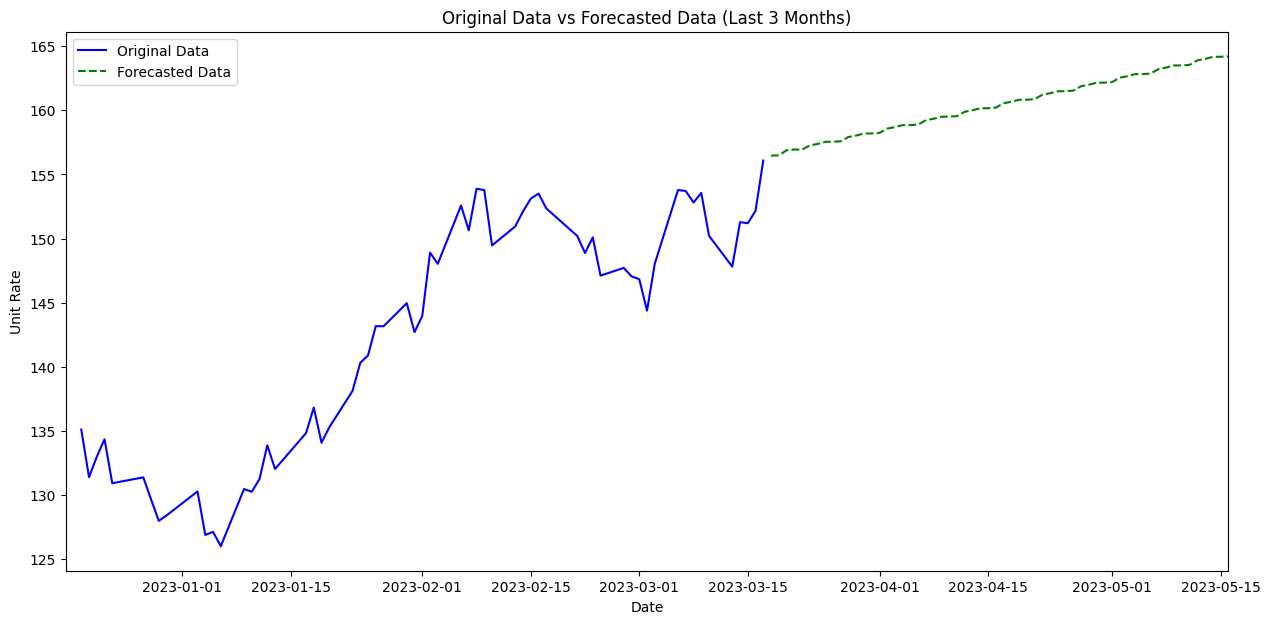

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

original_series = data['Open']

last_log_value = np.log(original_series.iloc[-1])

forecast_log = last_log_value + np.cumsum(forecast)
forecast_original_scale = np.exp(forecast_log)

start_date = original_series.index.max() + pd.Timedelta(days=1)
forecast_index = pd.date_range(start=start_date, periods=len(forecast), freq='D')  # 'D' stands for daily frequency.


three_months_ago = original_series.index.max() - pd.DateOffset(months=3)

original_series_last_3_months = original_series[three_months_ago:]

plt.figure(figsize=(15, 7))
plt.plot(original_series_last_3_months.index, original_series_last_3_months, label='Original Data', color='blue')
plt.plot(forecast_index, forecast_original_scale, label='Forecasted Data', color='green', linestyle='--')

plt.xlim([three_months_ago, forecast_index.max()])

# Labeling and formatting the plot
plt.xlabel('Date')
plt.ylabel('Unit Rate')
plt.legend()
plt.title('Original Data vs Forecasted Data (Last 3 Months)')
plt.show()


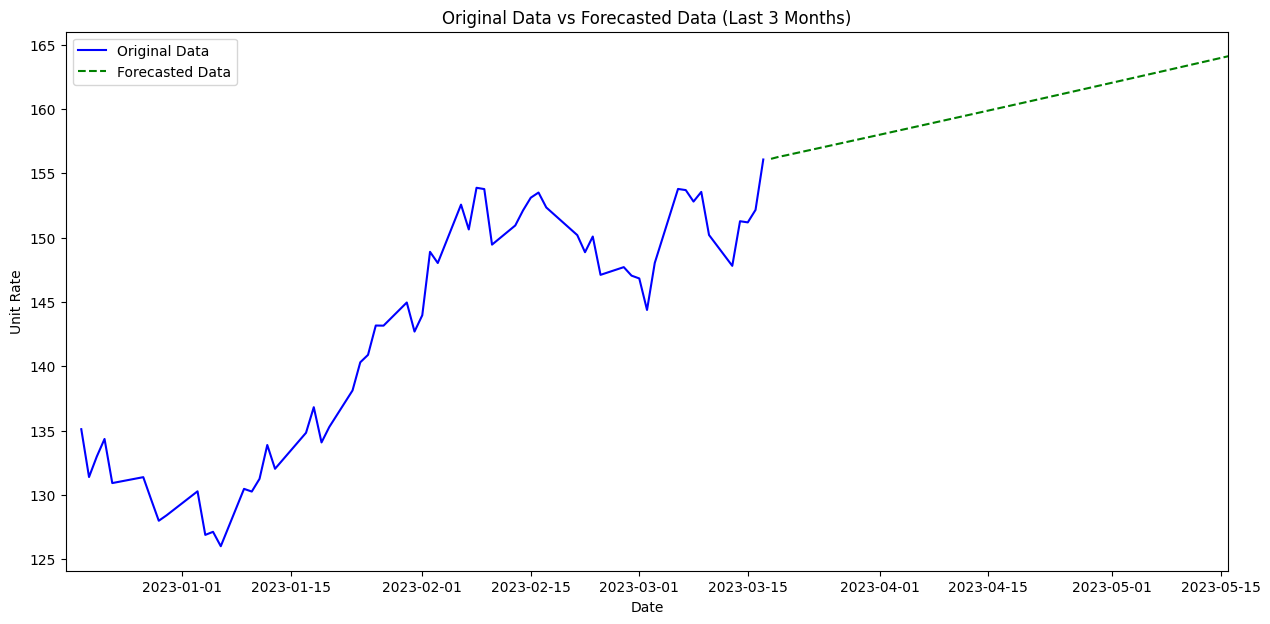

In [ ]:
original_series = data['Open']

last_log_value = np.log(original_series.iloc[-1])

forecast_log = last_log_value + np.cumsum(forecast2)
forecast_original_scale = np.exp(forecast_log)

start_date = original_series.index.max() + pd.Timedelta(days=1)
forecast_index = pd.date_range(start=start_date, periods=len(forecast2), freq='D')  # 'D' stands for daily frequency.


three_months_ago = original_series.index.max() - pd.DateOffset(months=3)

original_series_last_3_months = original_series[three_months_ago:]

plt.figure(figsize=(15, 7))
plt.plot(original_series_last_3_months.index, original_series_last_3_months, label='Original Data', color='blue')
plt.plot(forecast_index, forecast_original_scale, label='Forecasted Data', color='green', linestyle='--')

plt.xlim([three_months_ago, forecast_index.max()])

# Labeling and formatting the plot
plt.xlabel('Date')
plt.ylabel('Unit Rate')
plt.legend()
plt.title('Original Data vs Forecasted Data (Last 3 Months)')
plt.show()
